In [2]:
# some basic plots

from quantileRegression import quantileRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [3]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 0 
stopEvtmc  = 1000000
qr_mc.loadDF(#"/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",
             "/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             # ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['run', 'rho', 'nvtx', 'mass', 'weight', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadScEnergy', 'leadScPreshowerEnergy', 'leadSigmaRR', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'leadR9', 'leadS4', 'leadEtaWidth', 'leadPhiWidth', 'leadSigmaIeIe', 'leadCovarianceIetaIphi', 'leadCovarianceIphiIphi', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadScEnergy', 'subleadScPreshowerEnergy', 'subleadSigmaRR', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'subLeadPhoIDMVA', 'subleadR9', 'subleadS4', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadSigmaIeIe', 'subleadCovarianceIetaIphi', 'subleadCovarianceIphiIphi']
['cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/D

In [4]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 

# qr_data = quantileRegression("data")
# startEvtdata = 0
# stopEvtdata   = 100000
# print "Load the data dataframe"
# qr_data.loadDF(#"/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
#                "/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
#                "cicNoSigmaIetaIeta/trees/",
#                ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
#                startEvtdata, stopEvtdata )
# df = qr_data.getDF()

In [5]:
df = qr_mc.getDF()
#df = qr_data.getDF()
dfEB  = df.query('-1.44 < ScEta and ScEta < 1.44')
dfEE  = df.query('ScEta <-1.57 or 1.57 < ScEta')
dfES  = df.query('ScEta <-1.65 or 1.65 < ScEta')

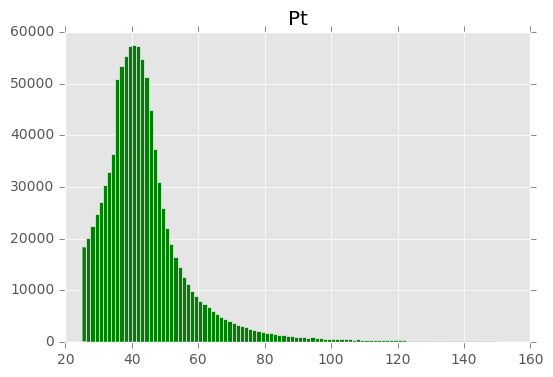

In [6]:
h = df.hist('Pt', bins=100, alpha = 1, color='g')

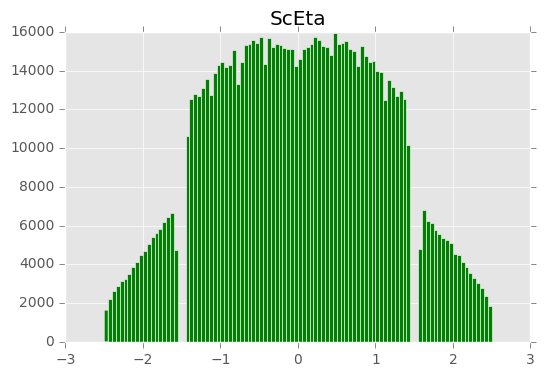

In [7]:
h = df.hist('ScEta', bins=100, alpha = 1, color='g')

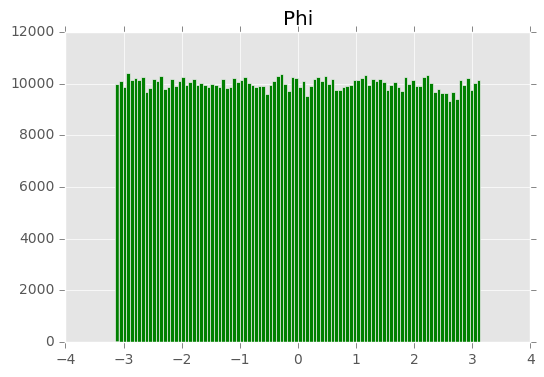

In [8]:
h = df.hist('Phi', bins=100, alpha = 1, color='g')

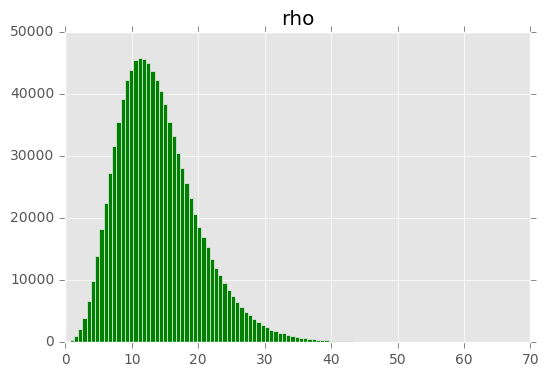

In [9]:
h = df.hist('rho', bins=100, alpha = 1, color='g')

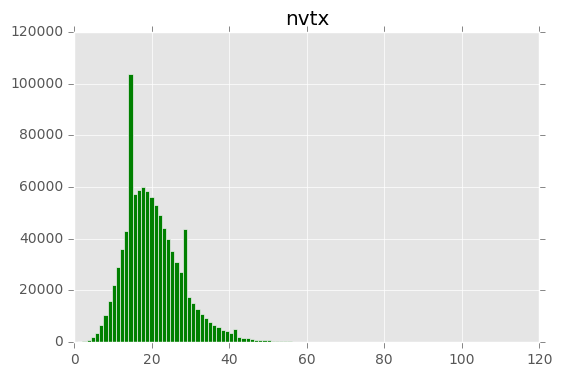

In [10]:
h = df.hist('nvtx', bins=100, alpha = 1, color='g')

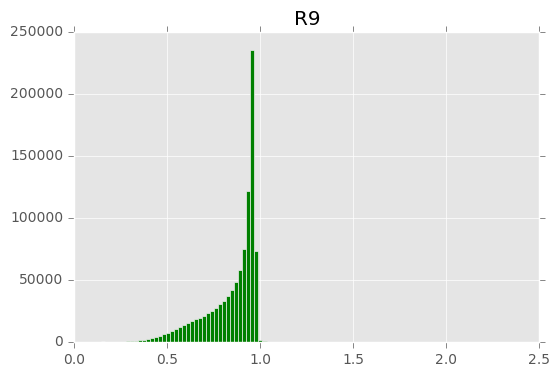

In [11]:
h = df.hist('R9', bins=100, alpha = 1, color='g')

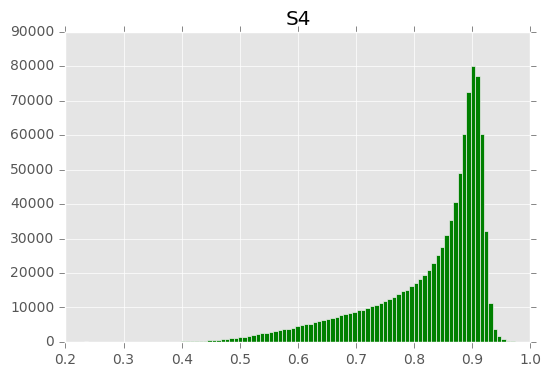

In [12]:
h = df.hist("S4", bins=100, alpha = 1, color='g')

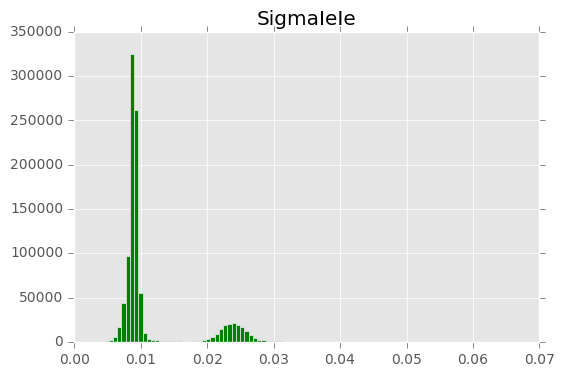

In [13]:
h = df.hist("SigmaIeIe", bins=100, alpha = 1, color='g')

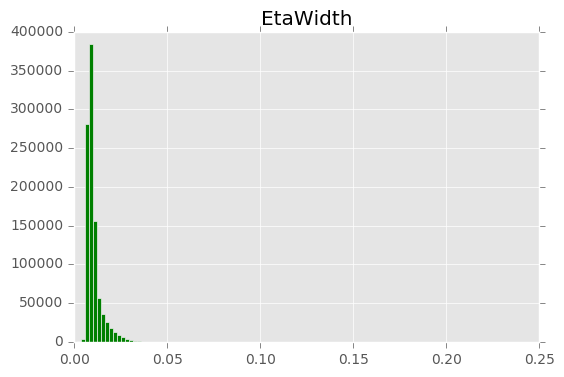

In [14]:
h = df.hist("EtaWidth", bins=100, alpha = 1, color='g')

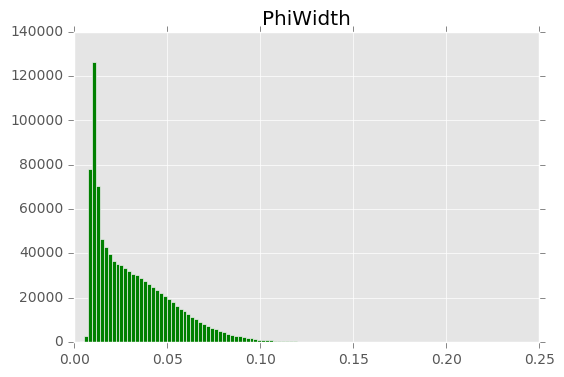

In [15]:
h = df.hist("PhiWidth", bins=100, alpha = 1, color='g')

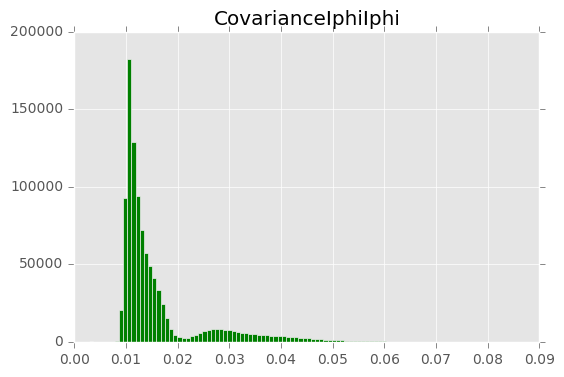

In [16]:
h = df.hist("CovarianceIphiIphi", bins=100, alpha = 1, color='g')

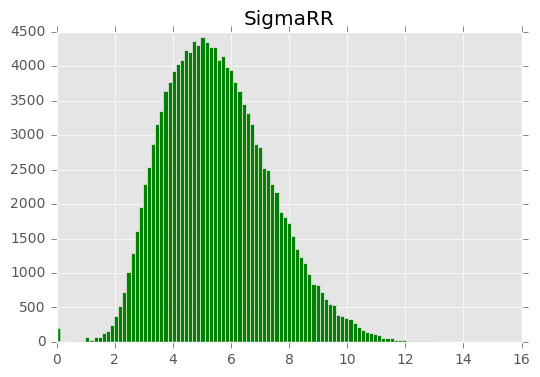

In [17]:
h = dfES.hist("SigmaRR", bins=100, alpha = 1, color='g')

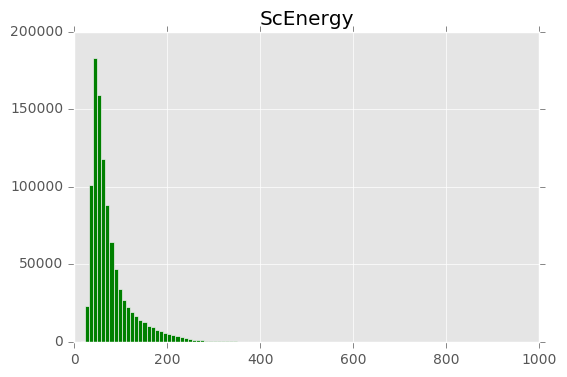

In [18]:
h = df.hist('ScEnergy', bins=100, alpha = 1, color='g')

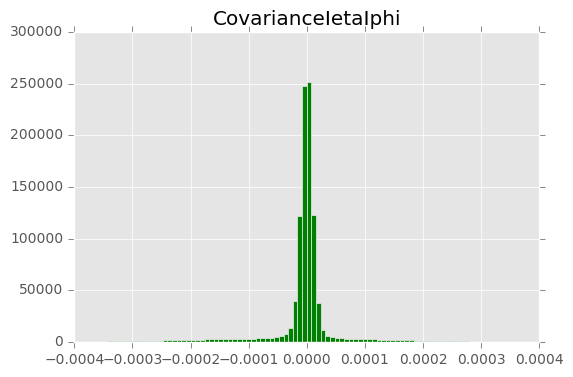

In [19]:
dfzoom = df.query('-0.0004 < CovarianceIetaIphi and CovarianceIetaIphi < 0.0004')
h = dfzoom.hist('CovarianceIetaIphi', bins=100, alpha = 1, color='g')

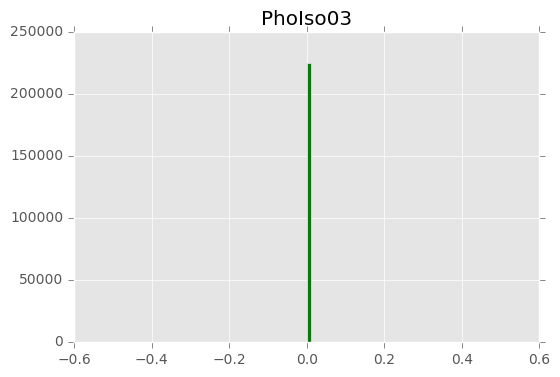

In [20]:
dfzoom = df.query('-0.5 < PhoIso03 and PhoIso03 < 0.01')
h = dfzoom.hist('PhoIso03', bins=100, alpha = 1, color='g')

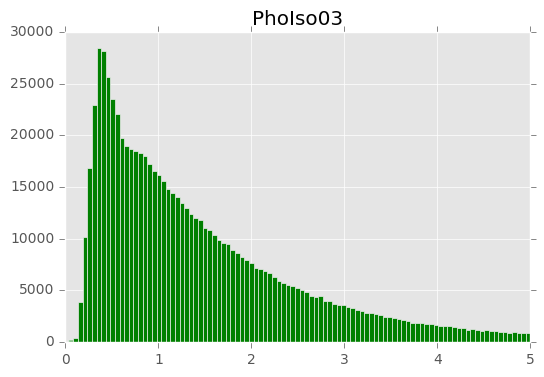

In [21]:
dfzoom = df.query('0.01 < PhoIso03 and PhoIso03 < 5.0')
h = dfzoom.hist('PhoIso03', bins=100, alpha = 1, color='g')

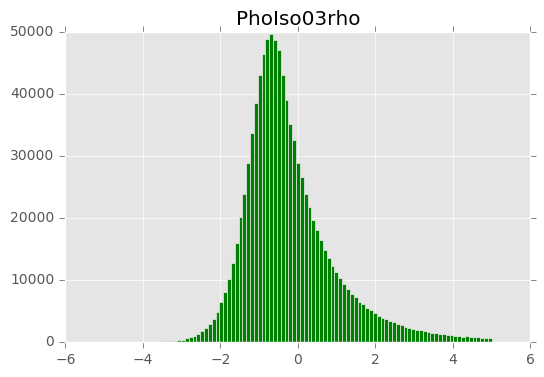

In [22]:
df['PhoIso03rho'] = df['PhoIso03'] - 0.1*df['rho']
dfzoom = df.query('-5 < PhoIso03rho and PhoIso03rho < 5')
h = dfzoom.hist('PhoIso03rho', bins=100, alpha = 1, color='g')

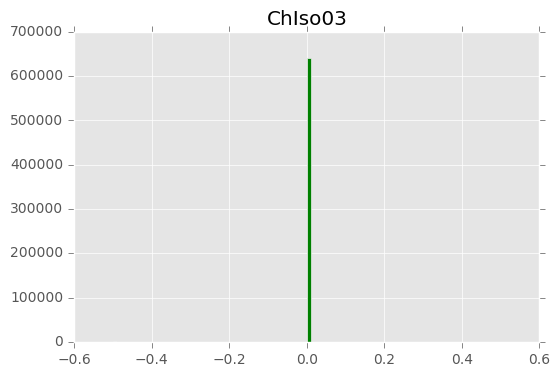

In [23]:
dfzoom = df.query('-0.5 < ChIso03 and ChIso03 < 0.01')
h = dfzoom.hist('ChIso03', bins=100, alpha = 1, color='g')

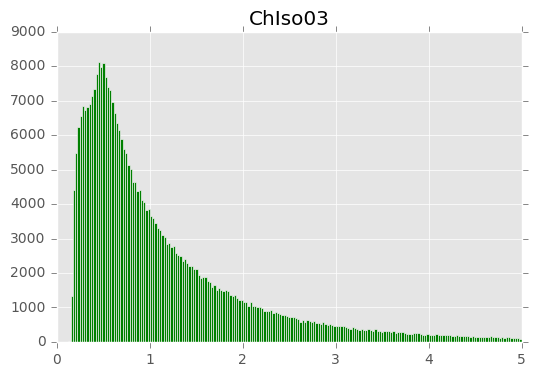

In [24]:
dfzoom = df.query('0.01 < ChIso03 and ChIso03 < 5.0')
h = dfzoom.hist('ChIso03', bins=200, alpha = 1, color='g')

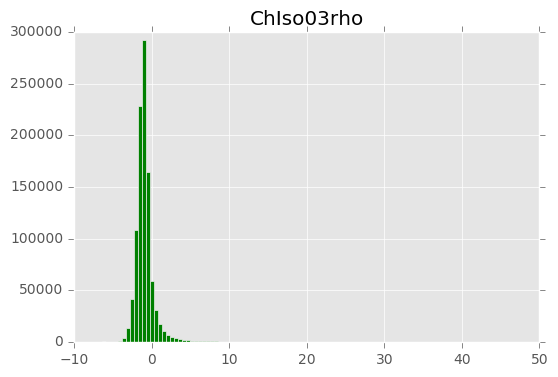

In [25]:
df['ChIso03rho'] = df['ChIso03'] - 0.1*df['rho']
h = df.hist('ChIso03rho', bins=100, alpha = 1, color='g')

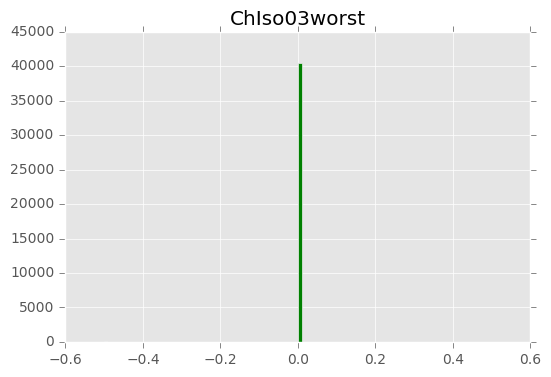

In [26]:
dfzoom = df.query('-0.5 < ChIso03worst and ChIso03worst < 0.01')
h = dfzoom.hist('ChIso03worst', bins=100,alpha = 1, color='g')

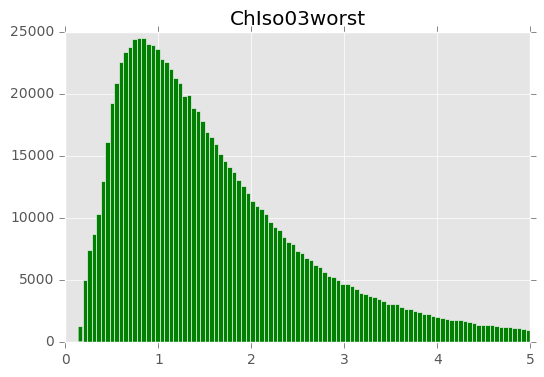

In [27]:
dfzoom = df.query('0.01 < ChIso03worst and ChIso03worst < 5.0')
h = dfzoom.hist('ChIso03worst', bins=100,alpha = 1, color='g')

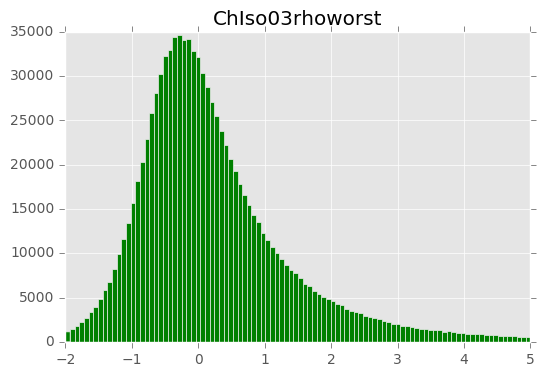

In [28]:
df['ChIso03rhoworst'] = df['ChIso03worst'] - 0.1*df['rho']
dfzoom = df.query('-2 < ChIso03rhoworst and ChIso03rhoworst < 5.0')
h = dfzoom.hist('ChIso03rhoworst', bins=100,alpha = 1, color='g')

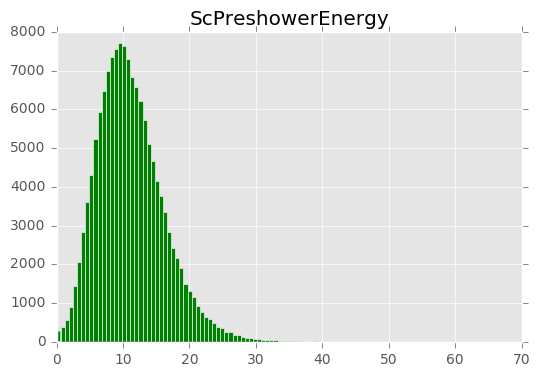

In [29]:
dfESzoom = df.query('ScEta < -1.65 or 1.65 < ScEta')
h = dfESzoom.hist('ScPreshowerEnergy', bins=100, alpha = 1, color='g')

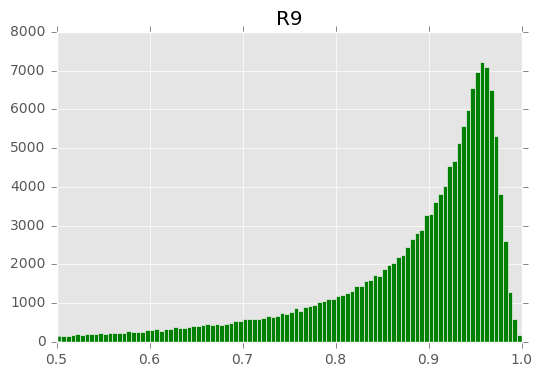

In [33]:
dftest   = dfEE.query("ChIso03<5 and mass > 70 and mass < 110 & R9> 0.5 & R9 <1.0 ")
h = dftest.hist('R9', bins=100, alpha = 1, color='g')

<Container object of 3 artists>

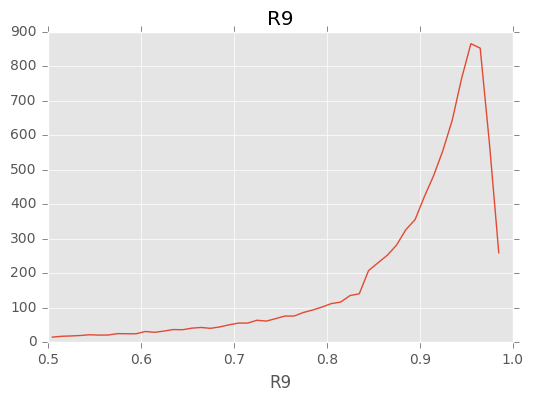

In [35]:
# The step at 0.84 is given by the weights
rv=np.arange(0.5,1.,0.01)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")

bins, _edges = np.histogram(dftest["R9"], rv, weights=dftest["weight"])
edges        = _edges[:len(_edges)-1]
bincenters   = 0.5*(_edges[1:]+_edges[:-1])
ax.set_title('R9')
plt.errorbar(bincenters, bins)# , color=Color, capsize=0)

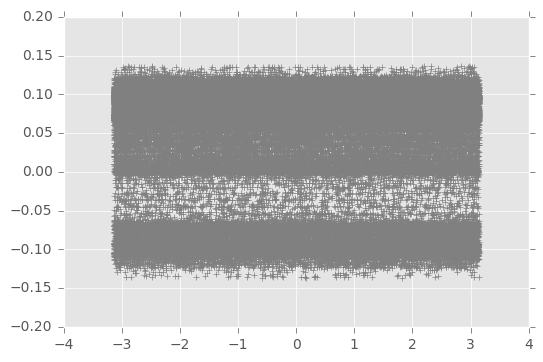

In [32]:
plt.scatter(dfEE["Phi"], dfEE["weight"], color='grey'  , marker='+')